## **Importing python libraries**

In [1]:
!pip install colorspacious

In [21]:
import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

import io
cmaps = OrderedDict()
# plt.style.use('default')

## **Overview**

Cara-cara menggunakan maplotplib. Terdapat 2 cara umum yang sama-sama bagus. Cara pertama adalah menggunakan *Object-oriented (OO) style* dan *pyplot-style*. 

### **Object-oriented Style**

*Obejct-oriented style* adalah metode yang lebih formal dalam menggunakan *Matplotlib*.

#### **Perintah dasar Matplotlib dengan *OO style***

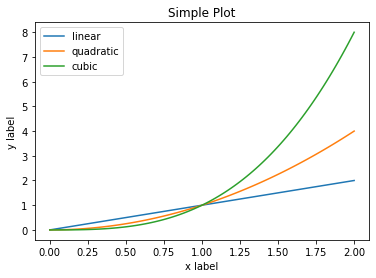

In [2]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.

ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.

ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.

ax.set_title("Simple Plot")  # Add a title to the axes.

ax.legend()  # Add a legend.

Object oriented style terlihat lebih rumit, tapi pada dasarnya kita mempunyai lebih banyak kontrol akan output yang ingin kita keluarkan. Dan untuk penambahan *axis* pada *figure* akan lebih mudah.

##### **Contoh 1**

In [44]:
# Membuat variabel untuk contoh kedua
x = np.linspace(0, 5, 11)
y = x ** 2

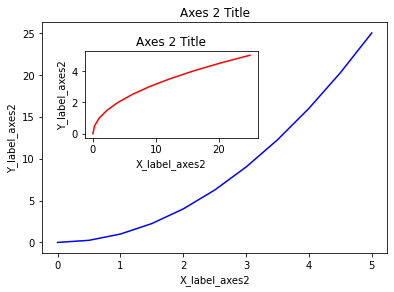

In [45]:
# contoh kedua

# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

#### subplots()

`plt.subplots()` merupakan perintah yang berperan mengatur *axis* secara otomatis.

##### **Contoh 2**

In [ ]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Kita bisa mengatur jumlah chart yang dikeluarkan ketika menggunakan `subplots()`

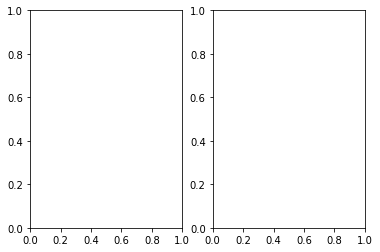

In [46]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

Dibawah ini adalah perintah untuk mengatur ukuran chart.

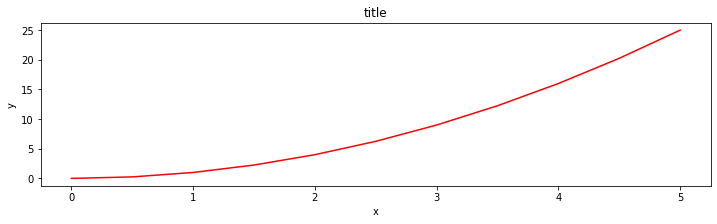

In [49]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

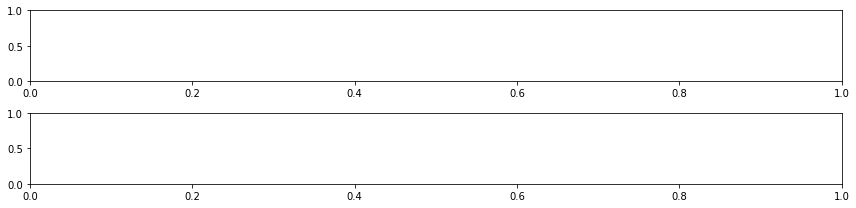

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,3))

fig.tight_layout() # mengatur agar axis tidak overlapping

#### **Legends, labels, dan titles**

In [ ]:
ax.set_title("title") # mengatur title

ax.set_xlabel("x") # mengatur label x axis
ax.set_ylabel("y") # mengatur label y axis

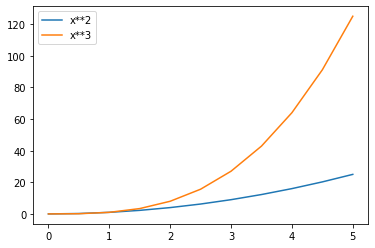

In [57]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")

ax.legend() # mengatur legend

### **Pyplot-style**

*Pyplot style* merupakan metode yang lebih sederhana dalam visualisasi menggunakan Matplotlib. Ada kelebihan dan kekurangan dari kedua *style*. Pyplot cocok ketika melakukan visualisasi untuk waktu cepat. Kekurangannya adalah kita tidak banyak bisa melakukan *customization*. 

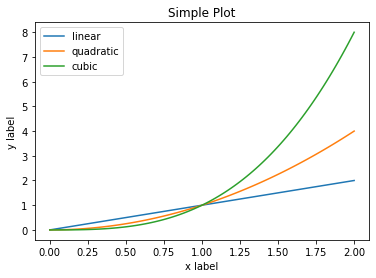

In [ ]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

# **Practice**

## **Importing data to Google Colab**

Kita akan meingimport data dari local storage dari data yang sudah diberikan: *sales-superstore*.

Merupakan data yang sering digunakan dalam latihan yang visualisasi data. Data ini dikeluarkan oleh Tableau dan tersedia gratis di internet.

Data ini merupakan data transaksi dari sebuah perusahaan retail penyuplai barang kebutuhan kantor di Amerika bernama *Superstore*.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sales_superstore.xls to sales_superstore (1).xls


In [4]:
df = pd.read_excel(io.BytesIO(uploaded['sales_superstore.xls']), sheet_name='Orders', parse_dates=['Order Date', 'Ship Date'])
# Dataset is now stored in a Pandas Dataframe

### **Data checking**

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.50
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.93
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6.15
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3.60
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2.50


In [5]:
df.shape # (rows, columns)

(9994, 22)

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost'],
      dtype='object')

In [7]:
df.dtypes # tipe masing-masing kolom atau variable

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country/Region            object
City                      object
State                     object
Postal Code              float64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
dtype: object

## **Commonly used chart**

Penggunaan chart mempengaruhi ketepatan dan kecepatan kita dalam menarik informasi. Sering kali kita lihat banyak visualisasi data yang menampilkan chart yang sangat menarik dan ber-estetika tinggi tapi malah gagal dalam fungsionalitas nya. 

Fungsi utama chart dalam visualisasi data adalah menampilkan data yang besar secara ringkas sehingga orang yang melihatnya bisa mengekstrak informasi dengan dengan benar.

Berikut dibawah adalah chart-chart yang lazim digunakan dan akan kita coba untuk menggunakannya sesuai dengan jati dirinya.

### **Line chart for time series**

Contoh-contoh yang saya sudah berikan diatas merupakan contoh dari line chart. Line chart mempunyai fungsi dasar untuk menampilkan data *over time*. Kenapa line chart? Karena dia mempunyai elemen keterkaitan satu sama lain. 

**Contoh:**
* Sales by month
* Profit by year
* Number of store visit per hour
* Page visits by day

Jadi tujuannya adalah agar kita bisa melihat **trend** yang ada di data yang kita miliki.





---



Perintah dibawah dilakukan untuk membuat suatu dataframe baru yang sudah diagregasi dilihat per tanggal masing-masing row. Ini dibuat dari dataframe yang sebelumnya kita import. Kenapa kita buat dataframe baru? Karena ketika kita ingin memvisualisasikan data, informasi yang ingin kita lihat itu cendrung hal-hal yang sudah di ringkas (*summary*). Kita ingin melihat data kita dari yang sangat besar menjadi sesuatu yang mudah untuk di handle. Jika tidak kita *summary* terlebih dahulu maka informasi yang kita lihat akan terlalu luas dan sangat sulit untuk mendapatkan informasi darinya. Kita akan terus melakukan agregasi data untuk kedepannya.

In [5]:
# agregasi Sales dan Profit grouping by Order Date
# sebelum di agregasi Order Date tidak unique dan tidak berurutan
by_date = df.groupby(['Order Date'])\
.agg({
    'Sales': 'sum'
    , 'Profit': 'sum'
    , 'Quantity': 'sum'
    , 'Shipping Cost': 'sum'
    , 'Discount': 'mean'})\
.reset_index()\
.sort_values('Order Date', ascending=True)

In [ ]:
# melihat 5 baris pertama dataframe baru
by_date.head()



---



In [36]:
# melakukan formatting tanggal dan merubah tipe ke datetime
# tapi pada dasarnya tipe date kita sudah datetime
by_date['Order Date'] = pd.to_datetime(by_date['Order Date'], format='%Y-%m-%d')

In [37]:
by_date.loc[5, 'Order Date'].day_name()

'Saturday'

In [38]:
# melihat value terkecil
by_date['Order Date'].min()

Timestamp('2016-01-03 00:00:00')

In [26]:
# melihat value terbesar
by_date['Order Date'].max()

Timestamp('2019-12-30 00:00:00')

In [27]:
# melihat jarak waktu
by_date['Order Date'].max() - by_date['Order Date'].min()

Timedelta('1457 days 00:00:00')

In [59]:
# mengekstrak hari dari tanggal dan membuat variabel baru pada dataframe
by_date['DayOfWeek'] = by_date['Order Date'].dt.day_name()
# by_date['Month'] = by_date['Order Date'].dt.month_name()
# by_date['Year'] = by_date['Order Date'].dt.year

In [60]:
by_date.head()

,Order Date,Sales,Profit,Quantity,Shipping Cost,Discount,DayOfWeek,Month,Year
0,2016-01-03,16.448,5.5512,2,5.49,0.2,Sunday,January,2016
1,2016-01-04,288.060,-65.9901,8,12.61,0.4,Monday,January,2016
2,2016-01-05,19.536,4.8840,3,0.96,0.2,Tuesday,January,2016
3,2016-01-06,4407.100,1358.0524,30,138.08,0.0,Wednesday,January,2016
4,2016-01-07,87.158,-71.9621,10,6.16,0.7,Thursday,January,2016




---



#### **Plotting Line Chart** 

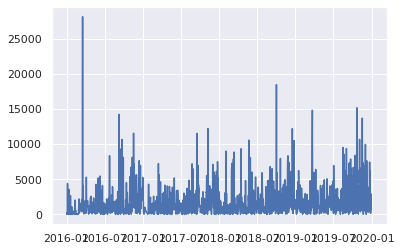

In [6]:
fig, ax = plt.subplots()

ax.plot(by_date['Order Date'], by_date['Sales'])

plt.show()

Bisa kita lihat gambar diatas bahwa sangat sulit sekali bagi kita untuk mengambil informasi. Perlu dilakukan modifikasi agar lebih mudah dicerna.

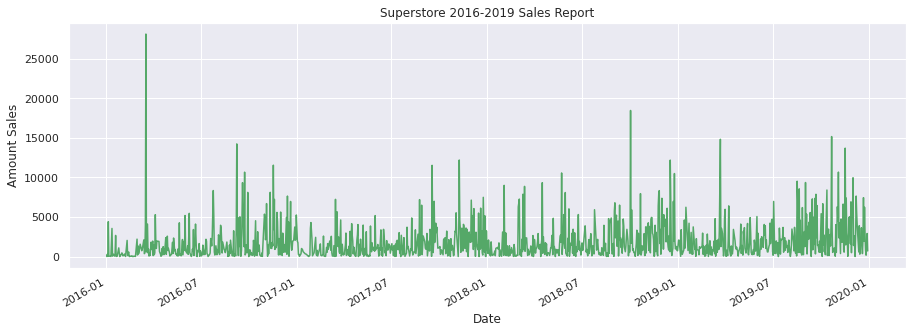

In [7]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(by_date['Order Date']
        , by_date['Sales']
        , color='g')

ax.set_xlabel('Date', )
ax.set_ylabel('Amount Sales')
ax.set_title('Superstore 2016-2019 Sales Report')

plt.gcf().autofmt_xdate() # untuk memberikan format otomatis pada label x date

plt.show()

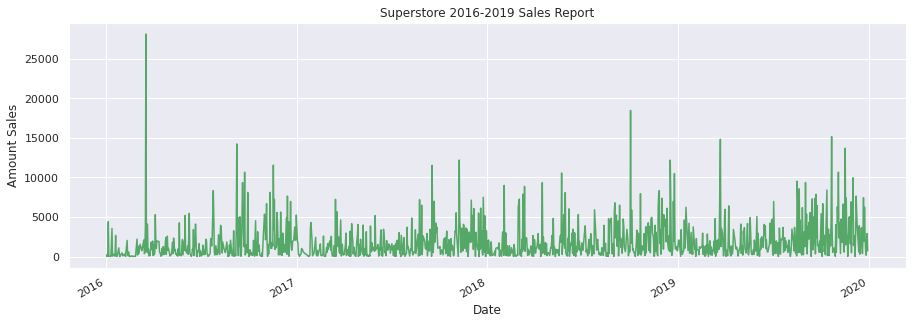

In [8]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(by_date['Order Date']
        , by_date['Sales']
        , color='g')

ax.set_xlabel('Date', )
ax.set_ylabel('Amount Sales')
ax.set_title('Superstore 2016-2019 Sales Report')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

fig.autofmt_xdate() # untuk memberikan format otomatis pada label x date

plt.show()

[More about date tickers](https://matplotlib.org/api/dates_api.html#date-tickers)



---



Jika melihat gambar diatas, masih sangat sulit bagi kita untuk mengambil informasi. Sering ketika bekerja dengan data time series kita ingin melihat nilai spesifik. 

Kita bisa melakukan filter by date. Ada 2 cara dalam melakukan filter by date.

In [ ]:
# creating a filter date
nineteen = (by_date['Order Date'] >= '2019')
by_date.loc[nineteen]

In [ ]:
# creating a filter date
eighteen = (by_date['Order Date'] >= pd.to_datetime('2018-01-01')) & (by_date['Order Date'] < pd.to_datetime('2019-01-01'))
by_date.loc[eighteen]

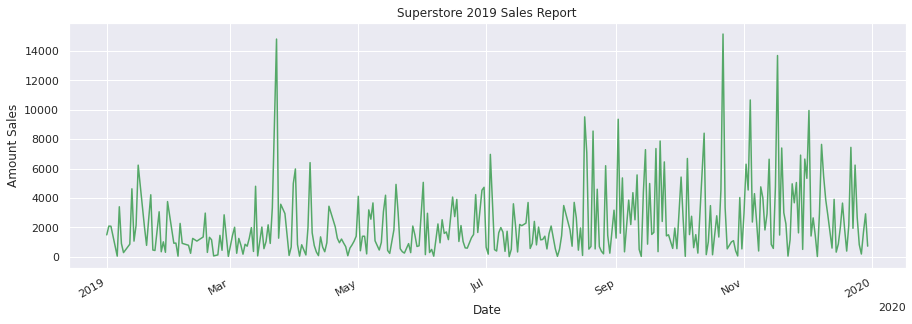

In [11]:
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(by_date.loc[nineteen]['Order Date']
        , by_date.loc[nineteen]['Sales']
        , color='g')

ax.set_xlabel('Date')
ax.set_ylabel('Amount Sales')
ax.set_title('Superstore 2019 Sales Report')

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.autofmt_xdate() # untuk memberikan format otomatis pada label x date

plt.show()

Bekerja dengan variabel *Dates* sebagai **index** di dataframe

In [12]:
by_date1 = by_date.set_index('Order Date')
by_date1

,Sales,Profit,Quantity,Shipping Cost,Discount
Order Date,,,,,
2016-01-03,16.4480,5.5512,2,5.49,0.200000
2016-01-04,288.0600,-65.9901,8,12.61,0.400000
2016-01-05,19.5360,4.8840,3,0.96,0.200000
2016-01-06,4407.1000,1358.0524,30,138.08,0.000000
2016-01-07,87.1580,-71.9621,10,6.16,0.700000
...,...,...,...,...,...
2019-12-26,814.5940,61.1202,12,14.49,0.225000
2019-12-27,177.6360,-31.9742,6,34.83,0.300000
2019-12-28,1657.3508,253.1188,64,310.89,0.216842


In [13]:
by_date1.index

DatetimeIndex(['2016-01-03', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-09', '2016-01-10', '2016-01-11',
               '2016-01-13', '2016-01-14',
               ...
               '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28',
               '2019-12-29', '2019-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1236, freq=None)

**Mengubah frequency index**

Dilakukan agar data berubah di break down menjadi per bulan. Hanya bisa dilakukan jika date sudah diubah menjadi index.

In [15]:
by_date_month = by_date1.resample('M').sum()

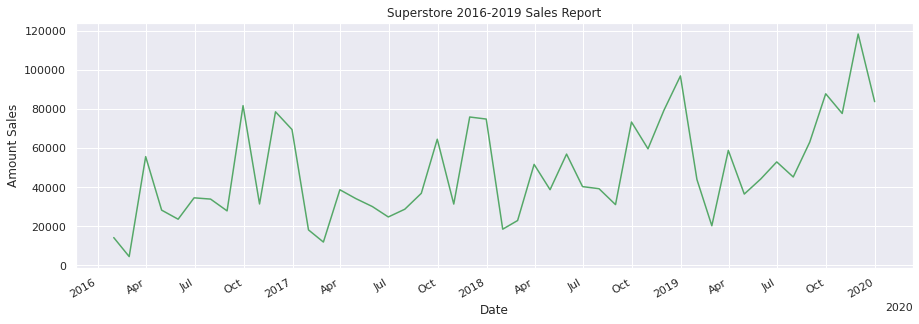

In [16]:
locator = mdates.AutoDateLocator(minticks=7, maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(by_date_month.index
        , by_date_month['Sales']
        , color='g')

ax.set_xlabel('Date')
ax.set_ylabel('Amount Sales')
ax.set_title('Superstore 2016-2019 Sales Report')

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

fig.autofmt_xdate() # untuk memberikan format otomatis pada label x date

plt.show()

#### **Shared Axis on Line Chart**

In [17]:
nineteen = by_date_month['2019-01':'2019-12']
eighteen = by_date_month['2018-01':'2018-12']

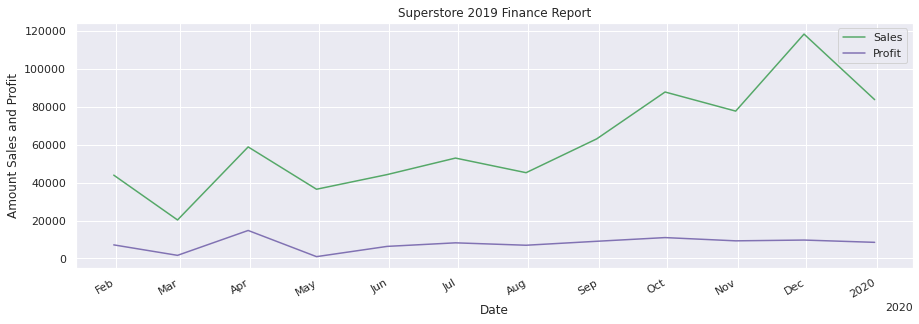

In [18]:
locator = mdates.AutoDateLocator(minticks=7, maxticks=20) #mengatur ticks secara otomatis
formatter = mdates.ConciseDateFormatter(locator) #mengatur ticks secara otomatis


fig, ax = plt.subplots(figsize=(15,5))
fig.autofmt_xdate() # untuk memberikan format otomatis pada label x date

ax.plot(nineteen.index
        , nineteen['Sales']
        , color='g', label='Sales')
ax.plot(nineteen.index
        , nineteen['Profit']
        , color='m', label='Profit')

ax.set_xlabel('Date')
ax.set_ylabel('Amount Sales and Profit')

ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)
ax.set_title('Superstore 2019 Finance Report')
ax.legend()

plt.show()

#### **Twin Axis on Line Chart**

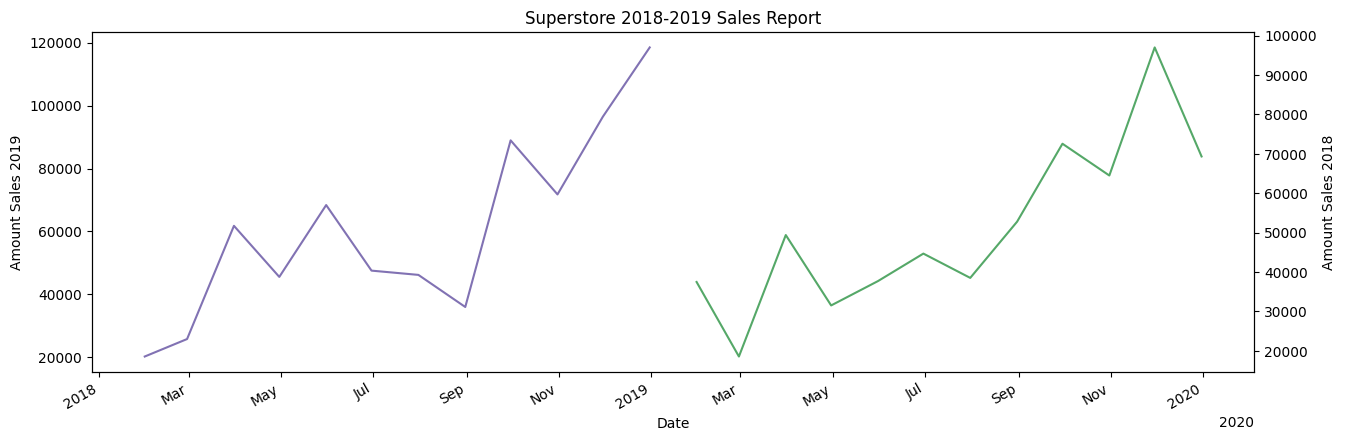

In [22]:
locator = mdates.AutoDateLocator(minticks=7, maxticks=20) #mengatur ticks secara otomatis
formatter = mdates.ConciseDateFormatter(locator) #mengatur ticks secara otomatis

fig, ax = plt.subplots(figsize=(15,5))
fig.autofmt_xdate() # untuk memberikan format otomatis pada label x date

ax.plot(nineteen.index
        , nineteen['Sales']
        , color='g', label='Sales 2019')
ax.set_xlabel('Date')
ax.set_ylabel('Amount Sales 2019')

ax2 = ax.twinx()
ax2.plot(eighteen.index
        , eighteen['Sales']
        , color='m', label='Sales 2018')
ax2.set_ylabel('Amount Sales 2018')

ax.xaxis.set_major_locator(locator) 
ax.xaxis.set_major_formatter(formatter)
ax.set_title('Superstore 2018-2019 Sales Report')

plt.show()

#### **Subplot on Line Chart**

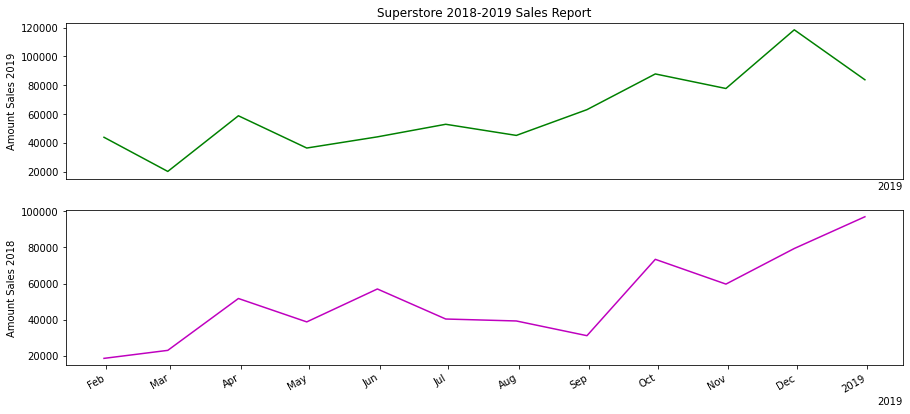

In [123]:
locator = mdates.AutoDateLocator(minticks=7, maxticks=20) #mengatur ticks secara otomatis
formatter = mdates.ConciseDateFormatter(locator) #mengatur ticks secara otomatis


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,7))
fig.autofmt_xdate() # untuk memberikan format otomatis pada label x date

ax[0].plot(nineteen.index
        , nineteen['Sales']
        , color='g', label='Sales 2019')
# ax[0].set_xlabel('Date')
ax[0].set_ylabel('Amount Sales 2019')

ax[1].plot(eighteen.index
        , eighteen['Sales']
        , color='m', label='Sales 2018')
ax[1].set_ylabel('Amount Sales 2018')

ax[0].set_title('Superstore 2018-2019 Sales Report')

ax[1].xaxis.set_major_locator(locator) 
ax[1].xaxis.set_major_formatter(formatter)

plt.show()

### **Bar chart for categorical comparison**

Bar chart merupakan chart yang sangat cocok digunakan untuk  melakukan perbandingan nilai pada variabel kategori. Hal ini dikarenakan bentuk batang yang tingginya disesuaikan dari penjumlahan nilai yang ada.

**Contoh**

* Mambandingkan Sales dari setiap region
* Mambandingkan sales dan budget berdasarkan product type
* Jumlah produksibarang dilihat dari produsen

#### **Plotting Bar Chart**

**Membuat dataframe sales dan profit by product subcategory.**

Sama dengan yang kita lakukan sebelumnya di line chart, kita harus mengagregasi variabel yang ingin kita tampilkan. Kalkulasi dibawah adalah kalkulasi dari 

In [60]:
# sns.set()
# plt.style.use('default')

In [107]:
by_subcategory = df.groupby(['Sub-Category'])\
.agg({
    'Sales': 'sum'
    , 'Profit': 'sum'
    , 'Quantity': 'sum'
    })\
.reset_index()\
.sort_values('Sales', ascending=False)

In [108]:
by_subcategory.head()

,Sub-Category,Sales,Profit,Quantity
13,Phones,330007.054,44515.7306,3289
5,Chairs,328449.103,26590.1663,2356
14,Storage,223843.608,21278.8264,3158
16,Tables,206965.532,-17725.4811,1241
3,Binders,203412.733,30221.7633,5974


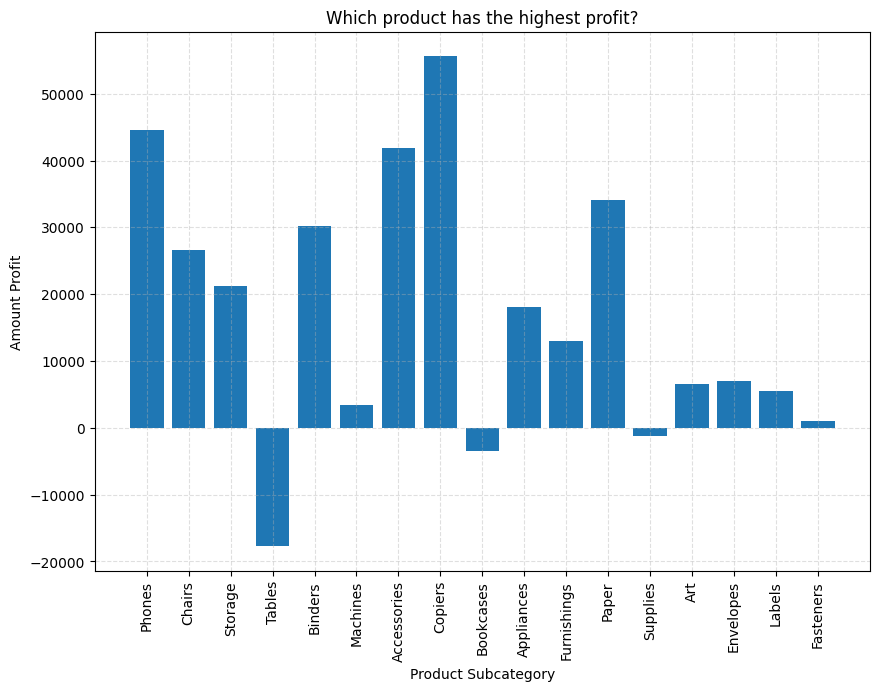

In [112]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(by_subcategory['Sub-Category']
       , by_subcategory['Profit'])

ax.set_xlabel('Product Subcategory')
ax.set_ylabel('Amount Profit')

ax.set_xticklabels(by_subcategory['Sub-Category'], rotation=90)
ax.set_title('Which product has the highest profit?')

ax.grid(True, alpha=0.4, linestyle='dashed')

plt.show()

#### **Filtering value**

In [143]:
by_subcategory_state = df.groupby(['Order Date', 'State', 'Sub-Category'])\
.agg({
    'Sales': 'sum'
    , 'Profit': 'sum'
    , 'Quantity': 'sum'
    })\
.reset_index()\
# .sort_values('Sales', ascending=False)

In [144]:
by_subcategory_state.head()

,Order Date,State,Sub-Category,Sales,Profit,Quantity
0,2016-01-03,Texas,Paper,16.448,5.5512,2
1,2016-01-04,Illinois,Binders,3.540,-5.4870,2
2,2016-01-04,Illinois,Labels,11.784,4.2717,3
3,2016-01-04,Illinois,Storage,272.736,-64.7748,3
4,2016-01-05,Pennsylvania,Art,19.536,4.8840,3


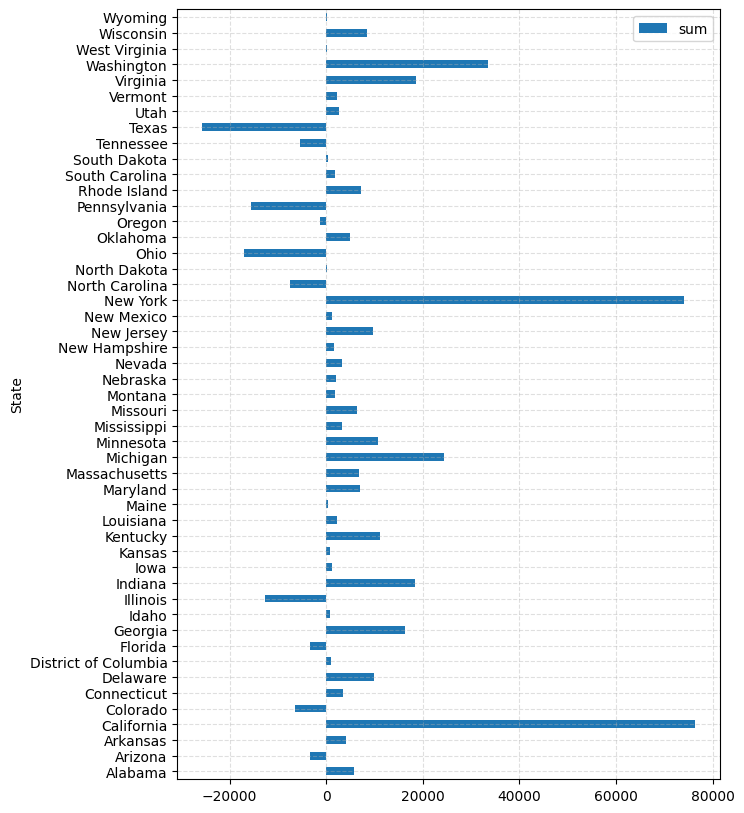

In [165]:
# cara cepat untuk visualisasi
# hanya disarankan untuk explorasi
by_subcategory_state.groupby('State')['Profit']\
.agg(['sum'])\
.plot.barh(figsize=(7,10))\
.grid(alpha=0.4, linestyle='dashed')

In [171]:
# creating a filter california state
california = (by_subcategory_state['State'] == 'California')

# filter by alabama and arizona
alabama_arizona = (by_subcategory_state['State'] == 'Alabama') | (by_subcategory_state['State'] == 'Arizona')

# filter sales below $1000
sales_low = (by_subcategory_state['Sales'] < 1000)

# filter no profit
no_profit = (by_subcategory_state['Profit'] < 0)

In [ ]:
by_subcategory_state.loc[california]

In [ ]:
by_subcategory_state.loc[alabama_arizona]



---



In [87]:
by_date_subcategory = df.groupby(['Order Date', 'Region'])\
.agg({
    'Sales': 'sum'
    , 'Profit': 'sum'
    , 'Quantity': 'sum'
    })\
.reset_index()\
.sort_values('Order Date', ascending=True)

In [95]:
by_date_subcategory.shape

(2955, 5)

In [98]:
# creating a filter date
nineteen = (by_date_subcategory['Order Date'] >= '2019')
by_date_subcategory.loc[nineteen]

,Order Date,Region,Sales,Profit,Quantity
2083,2019-01-01,Central,958.502,-389.2283,41
2084,2019-01-01,East,48.896,8.5568,4
2085,2019-01-01,West,474.430,199.2606,11
2086,2019-01-02,Central,1322.750,-151.3382,12
2087,2019-01-02,South,740.214,-61.5156,13
...,...,...,...,...,...
2948,2019-12-29,Central,209.700,100.6560,2
2951,2019-12-29,West,885.124,45.9582,22
2953,2019-12-30,East,466.842,34.6365,14
2952,2019-12-30,Central,209.300,56.5110,2


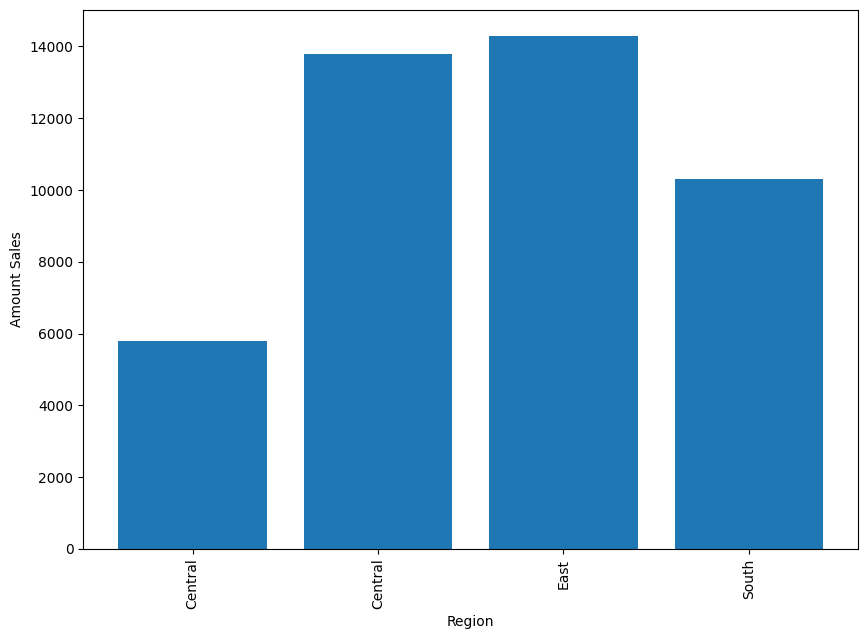

In [101]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(by_date_subcategory.loc[nineteen]['Region']
       , by_date_subcategory.loc[nineteen]['Sales'])

ax.set_xlabel('Region')
ax.set_ylabel('Amount Sales')

ax.set_xticklabels(by_date_subcategory['Region'], rotation=90)

plt.show()



---



**Top 10 Product**

In [40]:
by_subcategory_10 = df.groupby(['Sub-Category'])\
.agg({
    'Sales': 'sum'
    , 'Profit': 'sum'
    , 'Quantity': 'sum'
    })\
.reset_index()\
.sort_values('Sales', ascending=False)\
.head(10)

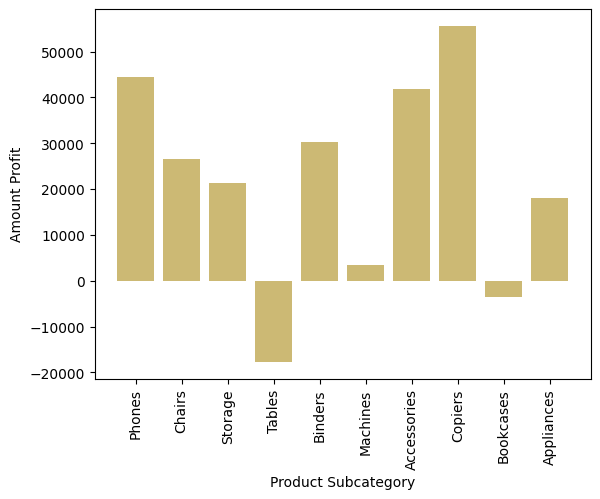

In [72]:
fig, ax = plt.subplots()

ax.bar(by_subcategory_10['Sub-Category']
       , by_subcategory_10['Profit']
       , color='y')

ax.set_xticklabels(by_subcategory_10['Sub-Category'], rotation=90)
ax.set_xlabel('Product Subcategory')
ax.set_ylabel('Amount Profit')

plt.show()

#### **Subplot on Bar Chart**

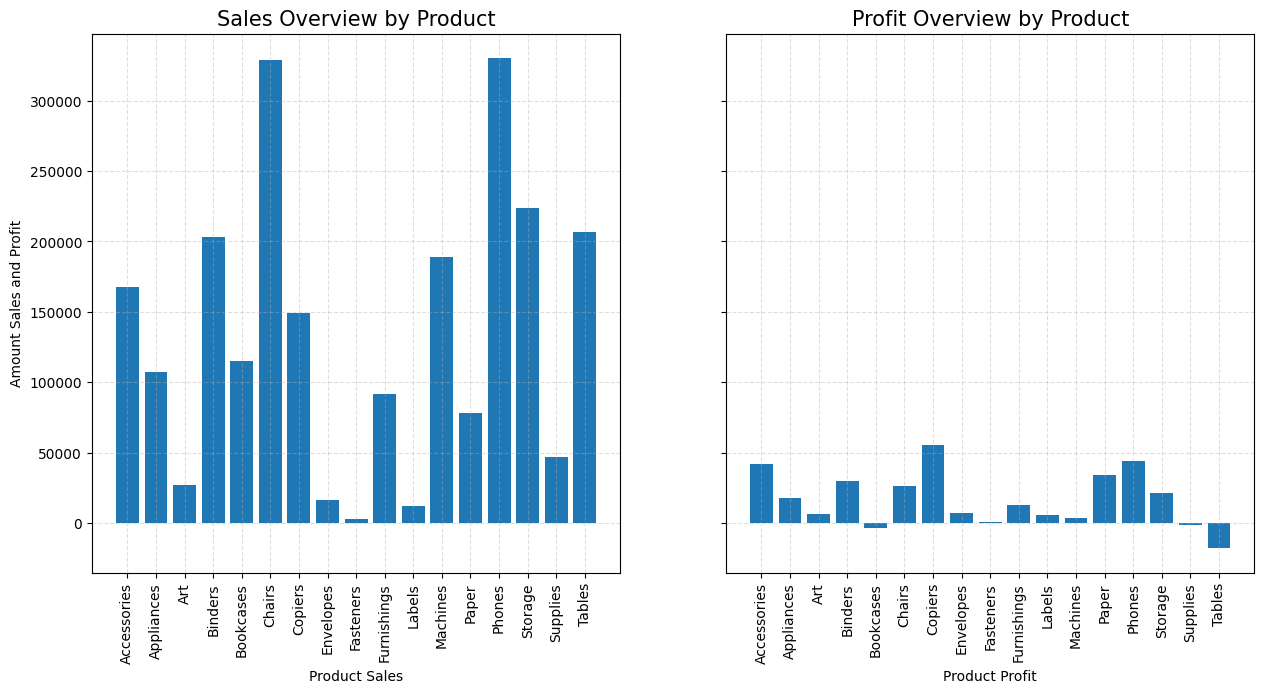

In [71]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,7))

ax[0].bar(by_subcategory['Sub-Category'], by_subcategory['Sales'])
ax[1].bar(by_subcategory['Sub-Category'], by_subcategory['Profit'])

ax[0].set_xlabel('Product Sales')
ax[1].set_xlabel('Product Profit')

ax[0].set_xticklabels(by_subcategory['Sub-Category'], rotation=90)
ax[1].set_xticklabels(by_subcategory['Sub-Category'], rotation=90)

ax[0].set_ylabel('Amount Sales and Profit')

ax[0].set_title('Sales Overview by Product', fontsize=15)
ax[1].set_title('Profit Overview by Product', fontsize=15)

ax[0].grid(True, alpha=0.4, linestyle='dashed')
ax[1].grid(True, alpha=0.4, linestyle='dashed')

plt.show()

#### **Stacked chart**

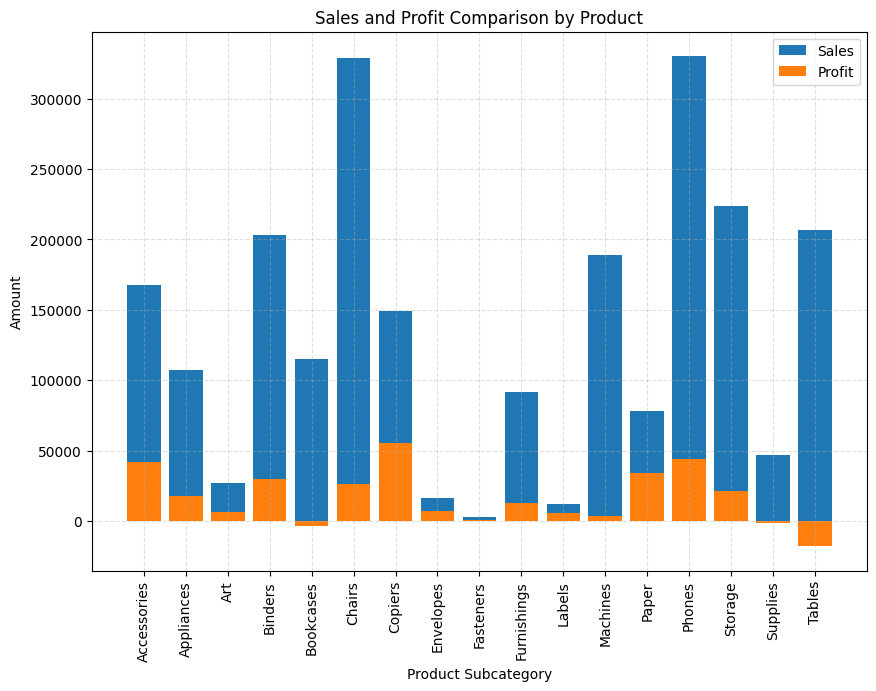

In [61]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(by_subcategory['Sub-Category'], by_subcategory['Sales'], label='Sales')
ax.bar(by_subcategory['Sub-Category'], by_subcategory['Profit'], label='Profit')

ax.set_xlabel('Product Subcategory')
ax.set_ylabel('Amount')

ax.set_xticklabels(by_subcategory['Sub-Category'], rotation=90)
ax.set_title('Sales and Profit Comparison by Product')

ax.grid(True, alpha=0.4, linestyle='dashed')
ax.legend()

plt.show()

#### **Using SEABORN**

In [48]:
# custom palette menggunakan hex code
custom_palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

[More about Seaborn color palette](https://seaborn.pydata.org/tutorial/color_palettes.html)

<Figure size 5000x800 with 0 Axes>

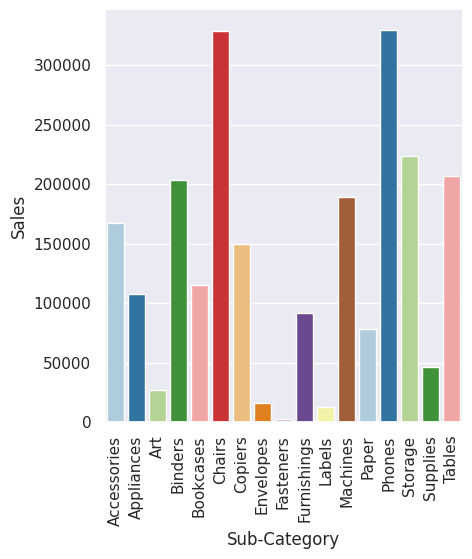

In [58]:
#Count of Sub-Category region wise
plt.figure(figsize=(50,8))

sns.catplot(x="Sub-Category"
            , y='Sales'
            , data=by_subcategory
            , kind='bar'
            , palette='Paired')

plt.xticks(rotation=90)
plt.show()

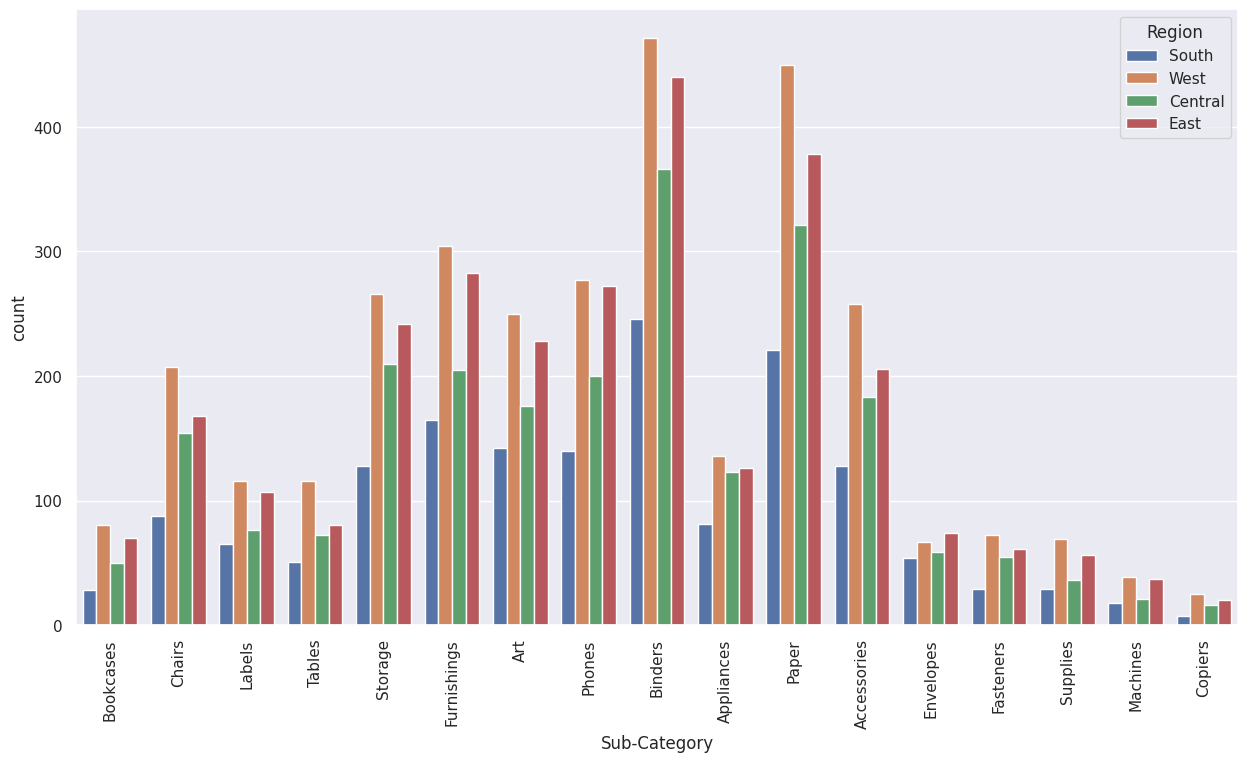

In [51]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))

sns.countplot(x="Sub-Category"
              , hue="Region" 
              , data=df
              , saturation=0.8)

plt.xticks(rotation=90)
plt.show()

#### **Contoh kasus**
Analisa produk yang tidak profit

IndexingError: ignored

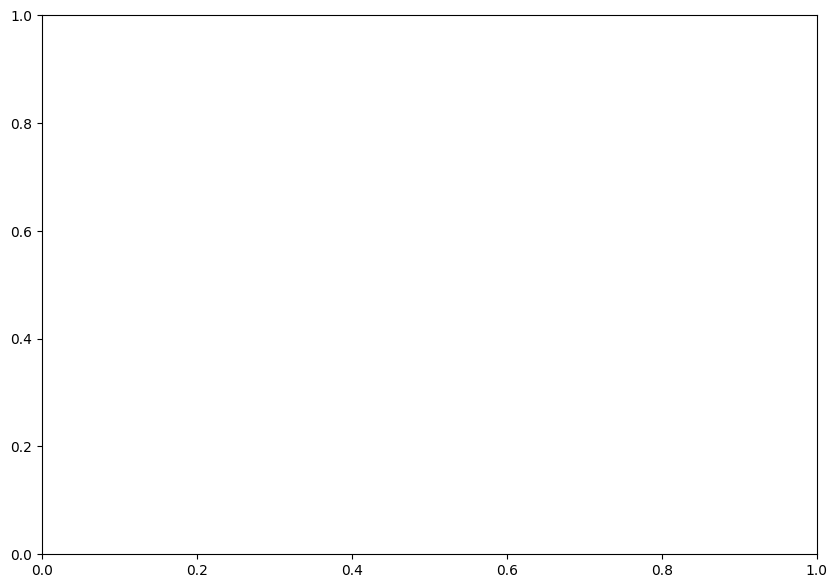

In [169]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(by_subcategory_state.loc[no_profit]['Sub-Category']
       , by_subcategory_state.loc[no_profit]['Profit'])

ax.set_xlabel('Product Subcategory')
ax.set_ylabel('Amount Profit')

ax.set_xticklabels(by_subcategory_state['Sub-Category'], rotation=90)

ax.set_title('Product with No Profit')

plt.show()

In [161]:
by_subcategory_state.loc[no_profit_2018]

,Order Date,State,Sub-Category,Sales,Profit,Quantity


In [153]:
# filter no profit
no_profit_2019 = (by_subcategory_state['Profit'] < 0) & (by_subcategory_state['Order Date'] == '2019')
no_profit_2018 = (by_subcategory_state['Profit'] < 0) & (by_subcategory_state['Order Date'] == '2018')
no_profit_2017 = (by_subcategory_state['Profit'] < 0) & (by_subcategory_state['Order Date'] == '2017')
no_profit_2016 = (by_subcategory_state['Profit'] < 0) & (by_subcategory_state['Order Date'] == '2016')

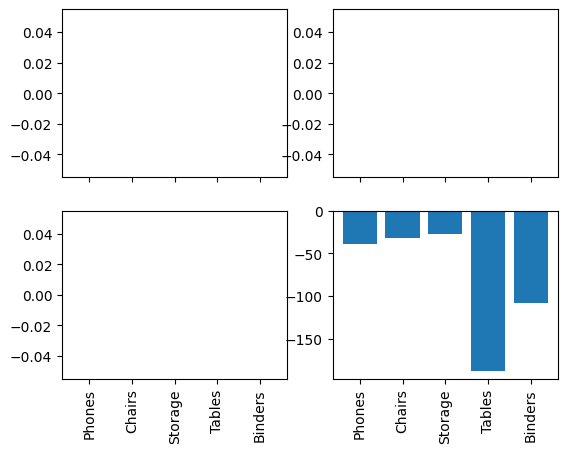

In [164]:
fig, ax = plt.subplots(2,2, sharex=True)

ax[0,0].bar(by_subcategory_state.loc[no_profit_2016]['Sub-Category']
            , by_subcategory_state.loc[no_profit_2016]['Profit'])
ax[0,1].bar(by_subcategory_state.loc[no_profit_2017]['Sub-Category']
            , by_subcategory_state.loc[no_profit_2017]['Profit'])
ax[1,0].bar(by_subcategory_state.loc[no_profit_2018]['Sub-Category']
            , by_subcategory_state.loc[no_profit_2018]['Profit'])
ax[1,1].bar(by_subcategory_state.loc[no_profit_2019]['Sub-Category']
            , by_subcategory_state.loc[no_profit_2019]['Profit'])

# ax[0].set_xlabel('Product Sales')
# ax[1].set_xlabel('Product Profit')

ax[0,0].set_xticklabels(by_subcategory['Sub-Category'], rotation=90)
ax[0,1].set_xticklabels(by_subcategory['Sub-Category'], rotation=90)
ax[1,0].set_xticklabels(by_subcategory['Sub-Category'], rotation=90)
ax[1,1].set_xticklabels(by_subcategory['Sub-Category'], rotation=90)

# ax[0].set_ylabel('Amount Sales and Profit')

# ax[0].set_title('Sales Overview by Product', fontsize=15)
# ax[1].set_title('Profit Overview by Product', fontsize=15)

# ax[0].grid(True, alpha=0.4, linestyle='dashed')
# ax[1].grid(True, alpha=0.4, linestyle='dashed')

plt.show()

### **Pie chart for part-of-the- whole**

Maksud part of the whole adalahh pie chart mempunyai desain yang mana kita bisa proporsi sesuatu secara keseluruhan. Bentuk lingkaran dari pie chart lah yang memungkinkan hal ini.

Tetapi pie chart tidak bisa selalu kita gunakan. Karena manusia tidak terlalu baik untuk membandingkan sudut. Ini jika kategori yang kita gunakan sebagai input terlalu banyak, sehingga visualisasi tidak efektif. Tipsnya adalah membatasi jumlah kategori yang ingin divisualisasikan.

In [172]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.50
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.93
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6.15
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,3.60
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2.50


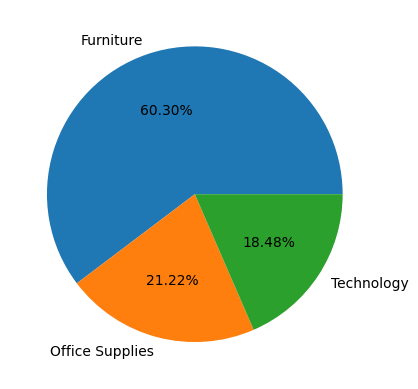

In [173]:
fig, ax = plt.subplots()

ax.pie(df['Category'].value_counts()
      , labels=df['Category'].unique()
      , colors=['tab:blue', 'tab:orange', 'tab:green']
      , autopct="%1.2f%%")

plt.show()

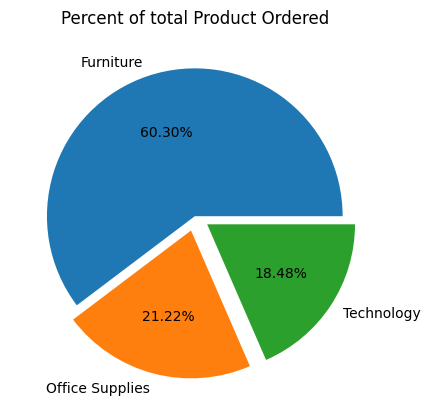

In [174]:
fig, ax = plt.subplots()

ax.pie(df['Category'].value_counts()
      , labels=df['Category'].unique()
      , colors=['tab:blue', 'tab:orange', 'tab:green']
      , autopct="%1.2f%%"
      , explode=[0, 0.1, 0.1])

ax.set_title('Percent of total Product Ordered')

plt.show()

### **Scatterplot for correlation**

Merupakan chart yang powerful untuk melihat relasi antar variabel dan apakah mereka berkorelasi. Chart ini paling sering digunakan dalam analisa statistik. Chart ini pun tergolong salah satu yang saintifik. Variabel yang bisa digunakan sebagi input hanyalah variabel numerik/kuantitatif.

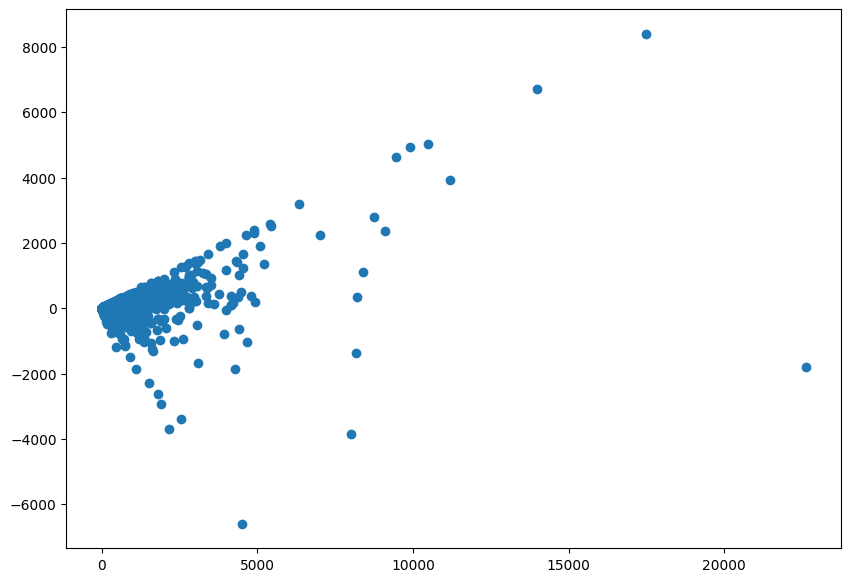

In [176]:
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter( df['Sales'], df['Profit'])

plt.show()

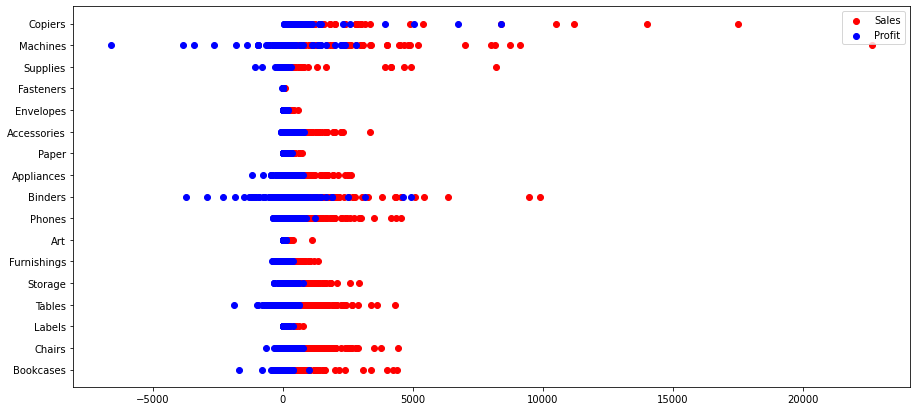

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

ax.scatter(df['Sales'], df['Sub-Category'], c='red', label='Sales')
ax.scatter(df['Profit'], df['Sub-Category'], c='blue', label='Profit')

ax.legend()

plt.show()

#### **Contoh kasus**

In [180]:
df_scatter = pd.read_csv("https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/07-ScatterPlots/2019-05-31-data.csv", sep=',')
df_scatter.head()

,view_count,likes,ratio
0,8036001,324742,96.91
1,9378067,562589,98.19
2,2182066,273650,99.38
3,6525864,94698,96.25
4,9481284,582481,97.22


In [182]:
df_scatter.shape

(200, 3)

In [185]:
view_count = df_scatter['view_count']
likes = df_scatter['likes']
ratio = df_scatter['ratio']

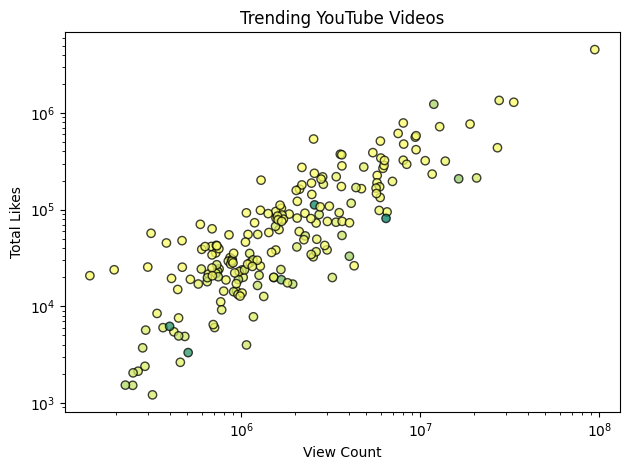

In [188]:
fig, ax = plt.subplots()

ax.scatter(view_count, likes, c=ratio, cmap='summer',
            edgecolor='black', linewidth=1, alpha=0.75)

# plt.colorbar()
# plt.set_label('Like/Dislike Ratio')

plt.xscale('log')
plt.yscale('log')

plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.tight_layout()

### **Histogram for distribution**

Sangat bagus untuk melihat distribusi data. Baik itu dari frekuensi distribusi variabel kualitatif maupun dari bins variabel kuantitatif.

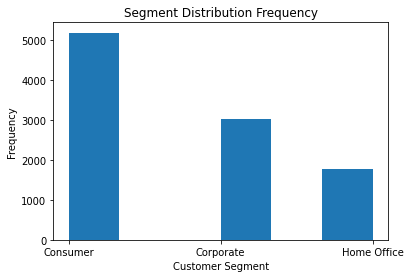

In [ ]:
fig, ax = plt.subplots()

ax.hist(df['Segment'], bins=6)

ax.set_xlabel('Customer Segment')
ax.set_ylabel('Frequency')
ax.set_title('Segment Distribution Frequency')

plt.show()

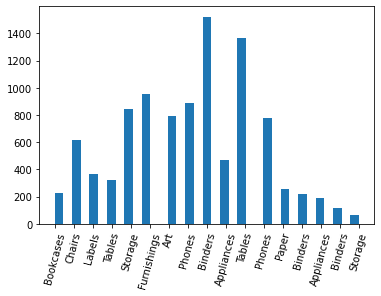

In [ ]:
fig, ax = plt.subplots()

ax.hist(df['Sub-Category'], bins='auto')
ax.set_xticklabels(df['Sub-Category'], rotation=75)
plt.show()

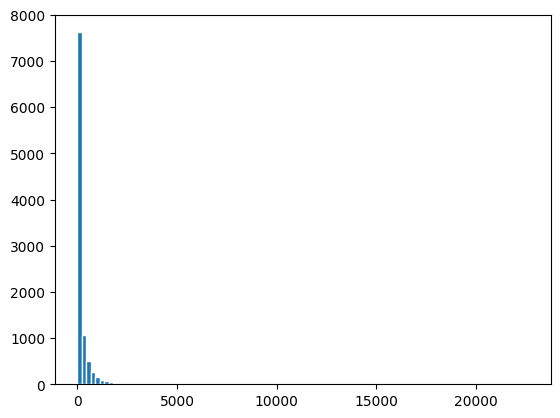

In [191]:
fig, ax = plt.subplots()

ax.hist(df['Sales'], bins=100, edgecolor='white')
# ax.set_xticklabels(df['Sales'], rotation=75)
plt.show()

#### **Contoh kasus**

In [192]:
data = pd.read_csv('https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Matplotlib/06-Histograms/data.csv', sep=',')

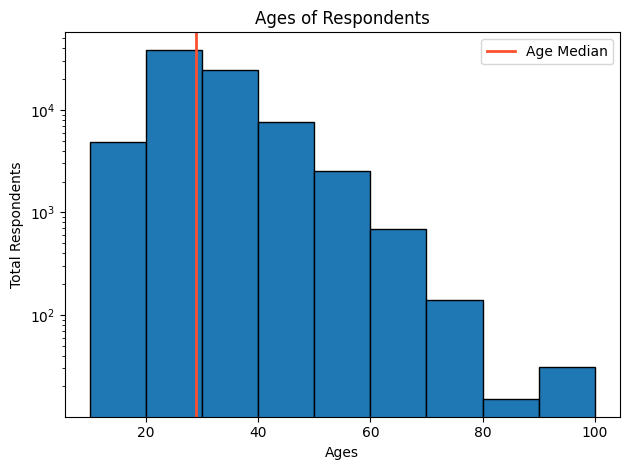

In [193]:
# plt.style.use('fivethirtyeight')

ids = data['Responder_id']
ages = data['Age']

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(ages, bins=bins, edgecolor='black', log=True)

median_age = 29
color = '#fc4f30'

plt.axvline(median_age, color=color, label='Age Median', linewidth=2)

plt.legend()

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.tight_layout()

plt.show()

### **Boxplot**

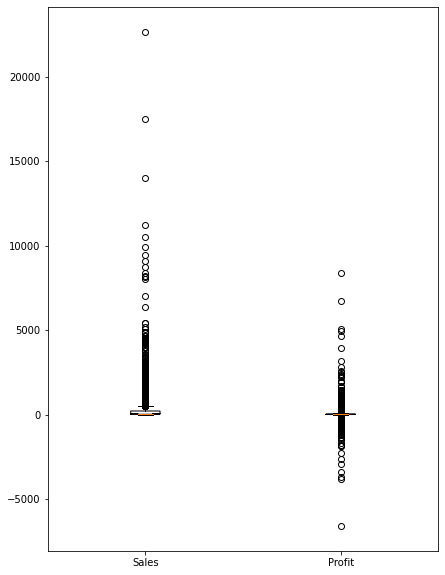

In [ ]:
fig, ax = plt.subplots(figsize=(7,10))

ax.boxplot([df['Sales'], df['Profit']], notch=True)
ax.set_xticklabels(['Sales', 'Profit'])

plt.show()

Seperti yang bis akita lihat bahwa variabel *Sales* mempunyai banyak sekali outlier. Boxplot merupakan salah satu cara untuk mendeteksi outlier secara viusal. Cara lainnya bisa dari menghitung *Z-score*, *IQR score*, dan *Scatterplot*.

Berurusan dengan *outlier*, kita bisa mengeluarkannya atau mengoreksi nilainya. Semuanya tergantung dari kebutuhan kita. Contoh dibawah adalah dimana nilai *outlier* dikeluarkan.

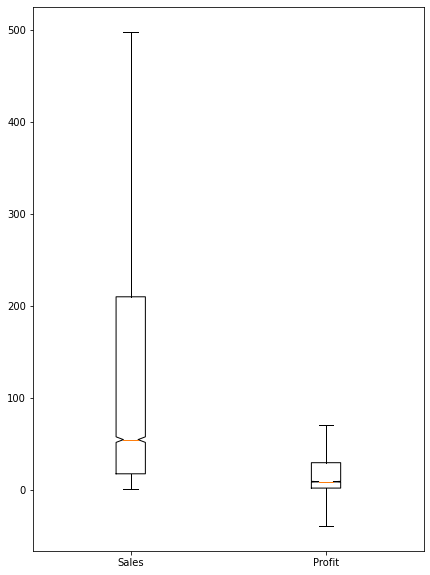

In [ ]:
fig, ax = plt.subplots(figsize=(7,10))

ax.boxplot([df['Sales'], df['Profit']], notch=True, sym='')
ax.set_xticklabels(['Sales', 'Profit'])

plt.show()

#### **Contoh kasus**